<a href="https://colab.research.google.com/github/Pipe-13/InteligenciaArtificial/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CARGA DEL DATASET**

In [74]:
%matplotlib inline
import numpy as np
import pandas as pd


In [75]:
df = pd.read_csv('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL/heart_disease_uci.csv')

In [76]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


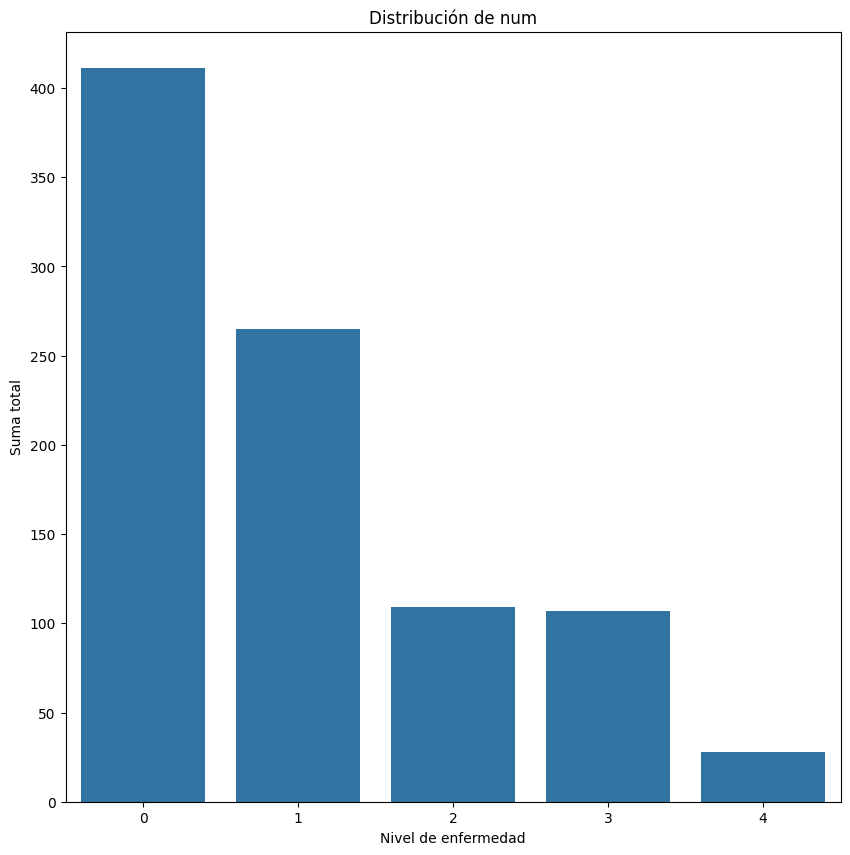

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="num")

plt.title("Distribución de num",)
plt.xlabel("Nivel de enfermedad")
plt.ylabel("Suma total")

plt.show()

¿El dataset está balanceado?

El dataset no se encuentra equilibrado ya que la cantidad por cada una de los niveles de enfermedad no es pareja

Mas en el contexto del dataframe, se podria decir que esta algo balanceado, pues aproximadamente 400 casos son 0 (negativos) y los demas (sumando 1-4) suman aproximadamente 480

In [78]:
# Eliminar columnas
df = df.drop('ca', axis=1)
df = df.drop('thal', axis=1)
df = df.select_dtypes(include=[np.number])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   trestbps  861 non-null    float64
 3   chol      890 non-null    float64
 4   thalch    865 non-null    float64
 5   oldpeak   858 non-null    float64
 6   num       920 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 50.4 KB


Las columnas 'ca' y 'thal' se eliminan porque tiene un alto porcetaje de valores nulos y solo se dejan las columnas numericas

In [79]:
# Imputacion de columnas
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['trestbps'].isnull().sum()

df['chol'] = df['chol'].fillna(df['chol'].median())
df['chol'].isnull().sum()

df['thalch'] = df['thalch'].fillna(df['thalch'].median())
df['thalch'].isnull().sum()

df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['oldpeak'].isnull().sum()

np.int64(0)

La columnas mostradas se rellenan con la mediana debido a que tienen muchos valores atipicos, a excepcion de la columna 'trestbps'que se imputo con la media

In [80]:
# Separacion de varialbles "x" y "Y" y division de datos en prueba y entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = df['num']
x_df = df.drop('num', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=0.20, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

El moidelo tiene una exactitud: 49%


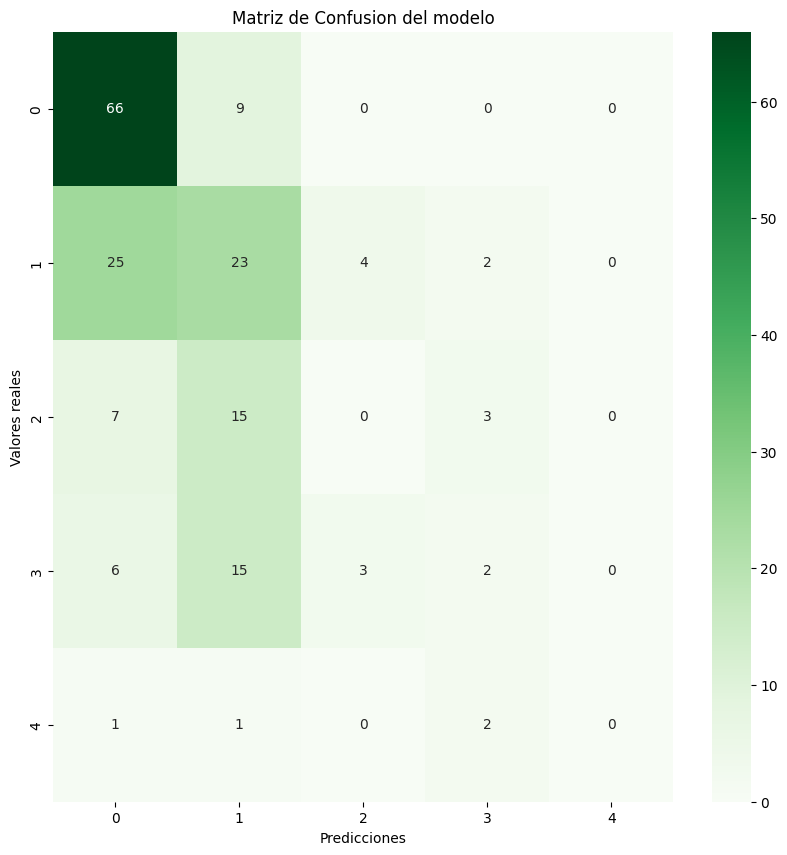

In [84]:
# Creacion del modelo, Prediccion y metricas de rendimiento
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"El moidelo tiene una exactitud: {accuracy:.0%}")

matriz = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(matriz, annot=True,cmap="Greens")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusion del modelo")
plt.show()

De acuerdo con los resultados obtenidos, podemos concluir lo siguiente:

El modelo alcanzó una exactitud del 49%, lo que indica que aproximadamente la mitad de sus predicciones son correctas.

En cuanto a la matriz de confusión, se observa que el modelo predijo correctamente 65 casos negativos, mientras que en 10 ocasiones confundió casos negativos con el nivel 1 de gravedad. En el caso de los positivos, el modelo muestra una alta tasa de confusión entre los distintos niveles de gravedad.

Por ejemplo, para los casos etiquetados como nivel 1, se presentaron 31 falsos negativos, siendo estos confundidos con casos negativos. A medida que aumenta la gravedad (niveles más altos), la tasa de confusión también incrementa.

El modelo tiene un buen desempeño al identificar si un paciente es negativo, pero presenta dificultades al clasificar correctamente los casos positivos según su nivel de gravedad. Sin embargo, puede considerarse aceptable en términos de detección general de positividad, aunque tiende a confundir especialmente los casos de nivel 1.